In [53]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

from scipy.signal import find_peaks
from numpy.fft import fft, ifft

Prominent frequencies for theta_k =  0.82  are  [np.float64(0.01), np.float64(0.03), np.float64(0.152), np.float64(0.169), np.float64(0.17200000000000001)]
Time periods for theta_k =  0.82  are  [100.          33.33333333   6.57894737   5.91715976   5.81395349]
Prominent Peak values for theta_k =  0.82  are  [np.float64(19.939389013616854), np.float64(13.658118024048436), np.float64(20.363169999084874), np.float64(15.662481571588955), np.float64(17.30763679613238)]


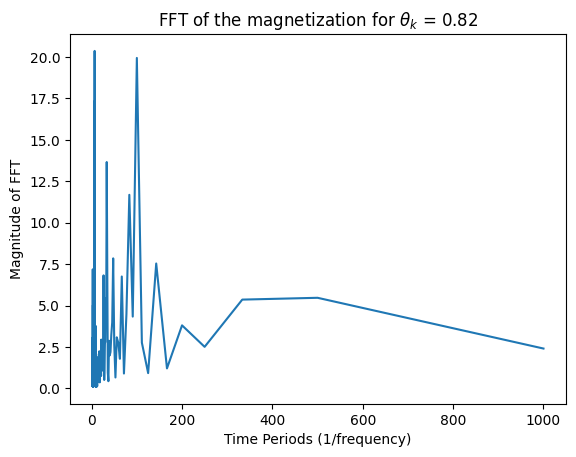

Prominent frequencies for theta_k =  0.65  are  [np.float64(0.012), np.float64(0.022), np.float64(0.025), np.float64(0.133), np.float64(0.135)]
Time periods for theta_k =  0.65  are  [83.33333333 45.45454545 40.          7.51879699  7.40740741]
Prominent Peak values for theta_k =  0.65  are  [np.float64(14.5159945496312), np.float64(12.973822176140422), np.float64(17.656609680074293), np.float64(17.40289565741982), np.float64(14.475693399132966)]


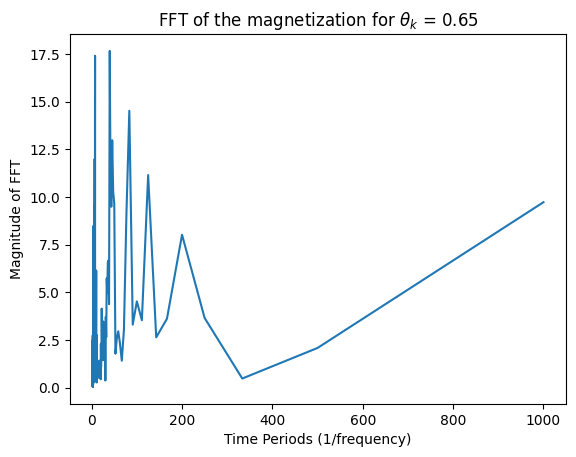

Prominent frequencies for theta_k =  0.62  are  [np.float64(0.008), np.float64(0.021), np.float64(0.024), np.float64(0.129), np.float64(0.131), np.float64(0.133)]
Time periods for theta_k =  0.62  are  [125.          47.61904762  41.66666667   7.75193798   7.63358779
   7.51879699]
Prominent Peak values for theta_k =  0.62  are  [np.float64(13.142985827544328), np.float64(15.471133840054017), np.float64(17.52759086148381), np.float64(18.27503131224983), np.float64(12.597580458658513), np.float64(12.738509466919744)]


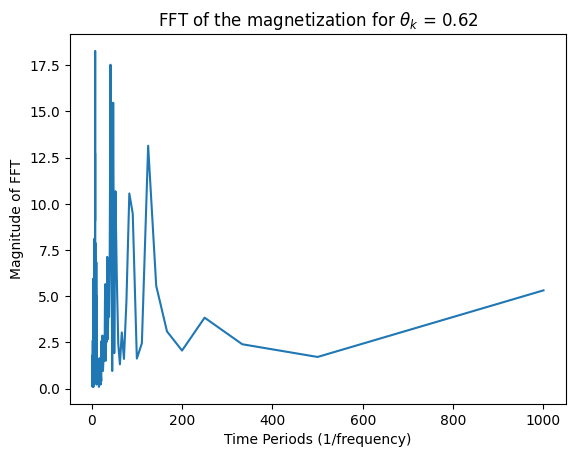

Prominent frequencies for theta_k =  0.55  are  [np.float64(0.008), np.float64(0.016), np.float64(0.022), np.float64(0.116), np.float64(0.12), np.float64(0.176)]
Time periods for theta_k =  0.55  are  [125.          62.5         45.45454545   8.62068966   8.33333333
   5.68181818]
Prominent Peak values for theta_k =  0.55  are  [np.float64(16.305190127498356), np.float64(36.01697887606704), np.float64(20.903450314560327), np.float64(22.402405639674473), np.float64(30.929512505129605), np.float64(14.121298804296377)]


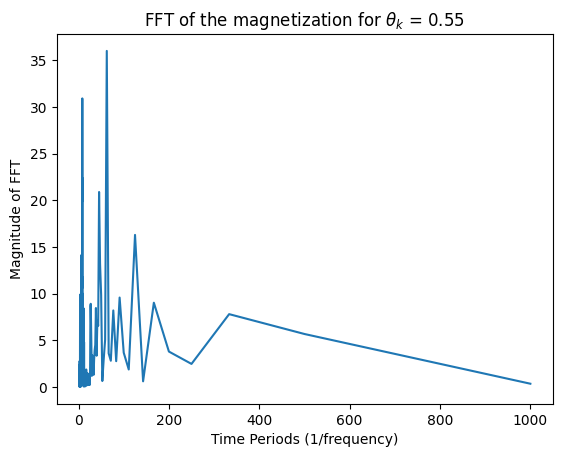

Prominent frequencies for theta_k =  0.52  are  [np.float64(0.006), np.float64(0.009000000000000001), np.float64(0.013000000000000001), np.float64(0.015), np.float64(0.021), np.float64(0.025), np.float64(0.111), np.float64(0.114), np.float64(0.116)]
Time periods for theta_k =  0.52  are  [166.66666667 111.11111111  76.92307692  66.66666667  47.61904762
  40.           9.00900901   8.77192982   8.62068966]
Prominent Peak values for theta_k =  0.52  are  [np.float64(12.538683474288051), np.float64(12.265013906823325), np.float64(12.346529546843534), np.float64(27.012639763958738), np.float64(17.135148652844304), np.float64(13.018494682533152), np.float64(19.74757557526111), np.float64(12.583339961824441), np.float64(18.013405941184324)]


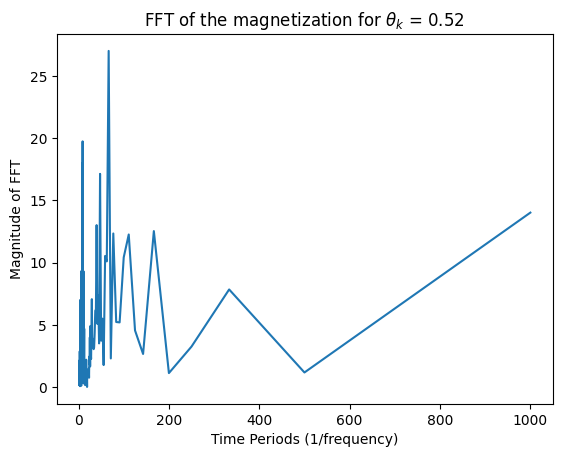

Prominent frequencies for theta_k =  0.45  are  [np.float64(0.01), np.float64(0.019), np.float64(0.084), np.float64(0.08700000000000001), np.float64(0.1), np.float64(0.105)]
Time periods for theta_k =  0.45  are  [100.          52.63157895  11.9047619   11.49425287  10.
   9.52380952]
Prominent Peak values for theta_k =  0.45  are  [np.float64(30.515990738247712), np.float64(18.63665383815421), np.float64(23.267831888646338), np.float64(12.641443180160786), np.float64(22.7084040798369), np.float64(39.375506484676485)]


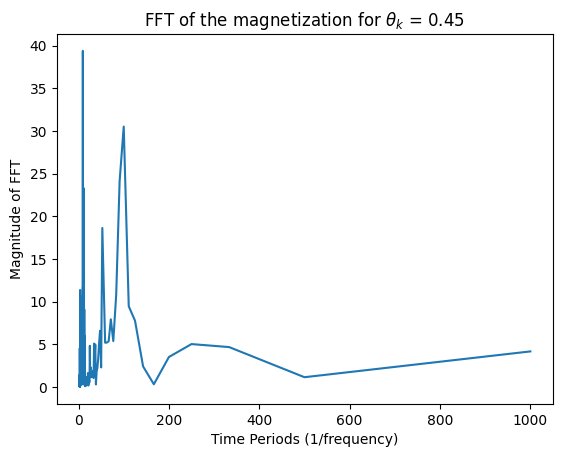

Prominent frequencies for theta_k =  0.42  are  [np.float64(0.009000000000000001), np.float64(0.018000000000000002), np.float64(0.08), np.float64(0.083), np.float64(0.096), np.float64(0.101), np.float64(0.187)]
Time periods for theta_k =  0.42  are  [111.11111111  55.55555556  12.5         12.04819277  10.41666667
   9.9009901    5.34759358]
Prominent Peak values for theta_k =  0.42  are  [np.float64(32.66960959592951), np.float64(19.549451394059826), np.float64(21.075261811023253), np.float64(18.206927444928922), np.float64(15.20697088930938), np.float64(34.203028691283805), np.float64(13.417815495052745)]


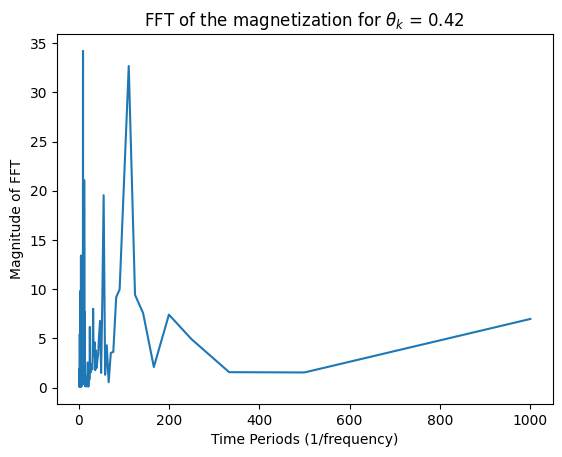

In [54]:
N = 6
theta= 1.07 #pass the true values here
theta_k_list = [0.82, 0.65, 0.62, 0.55,0.52, 0.45, 0.42]
max_trotter_steps = 1000

#i = 0

sz_vals = [0]*max_trotter_steps 
sz_vals2 = [0]*max_trotter_steps
sz_vals3 = [0]*max_trotter_steps
sz_vals4 = [0]*max_trotter_steps
sz_vals5 = [0]*max_trotter_steps

"""for i in range(max_trotter_steps):
    data = np.loadtxt(f"scaled_codes/data/N = {N}, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_TS.txt")
    sz_vals[i] = data[1]
    data = np.loadtxt(f"scaled_codes/data/N = {N}, theta = {theta}, theta_k = {theta_k}, t = {i}_sz.txt")
    sz_vals4[i] = data[1]



for i in range(max_trotter_steps):
    data3 = np.loadtxt(f"scaled_codes/data/N = 8, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_TS.txt")
    sz_vals3[i] = data3[1]"""
for theta_k in theta_k_list:
    for i in range(max_trotter_steps):
        data2 = np.loadtxt(f"../scaled_codes/data2/N = 6, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_tol.txt")
        sz_vals2[i] = data2[1]  

        #FFT to find out the frequency of the oscillations
    fft1 = fft(sz_vals2)
        #find list of frequencies

    freqs = np.fft.fftfreq(len(sz_vals2))
        #find the peaks
    peaks, _ = find_peaks(np.abs(fft1))
    peaks = peaks[freqs[peaks] > 0]

    #print("Peaks for theta_k = ",theta_k," are ",peaks) #print the peaks
    #print(freqs[peaks]) #print the frequencies with magnitude above 10

    #print the frequencies with magnitude above 10
    prom_freqs = [freqs[i] for i in peaks if np.abs(fft1[i]) > 12]

    time_periods = 1/np.abs(prom_freqs)

    #print("Peaks for theta_k = ",theta_k," are ",peaks) #print the peaks

    print("Prominent frequencies for theta_k = ",theta_k," are ",prom_freqs) #print the prominent frequencies
    print("Time periods for theta_k = ",theta_k," are ",time_periods) #print the time periods

    peak_vals = [np.abs(fft1[i]) for i in peaks if np.abs(fft1[i]) > 12] #find the prominent peak values

    print("Prominent Peak values for theta_k = ",theta_k," are ",peak_vals) #print the peak values

    #Plot only the positive frequencies and the magnitudes at those frequencies

    freqs_pos = freqs[freqs > 0]
    time_periods_1 = 1/freqs_pos
    fft1_pos = fft1[freqs > 0]

    plt.plot(time_periods_1,np.abs(fft1_pos))
    plt.xlabel("Time Periods (1/frequency)")
    plt.ylabel("Magnitude of FFT")
    plt.title(r"FFT of the magnetization for $\theta_k$ = " + str(theta_k))
    plt.show()


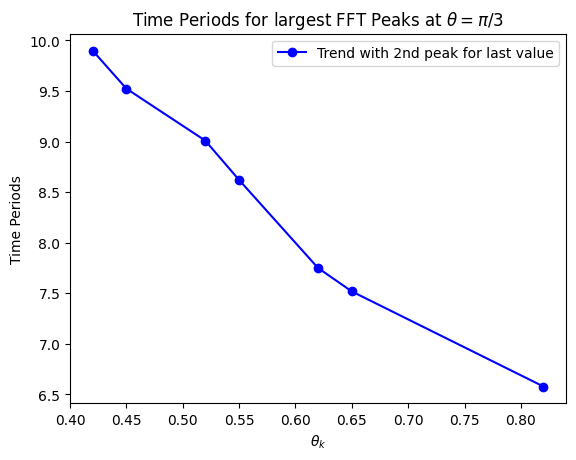

In [55]:
timeperiod_list = [100,83.333,125,62.5,111.11111111,100,111.11111111]
timeperiod_list_2 = [6.578,7.518,7.75,8.62,9.009,9.523,9.90]

#plt.plot(theta_k_list,timeperiod_list,'r',label = "Anomalous with max peaks")
plt.plot(theta_k_list,timeperiod_list_2,'bo-',label = "Trend with 2nd peak for last value")
plt.xlabel(r"$\theta_k$")
plt.ylabel("Time Periods")
plt.legend()
plt.title("Time Periods for largest FFT Peaks at " + r"$\theta = \pi/3$")
plt.show()

Prominent frequencies for theta =  1.07  are  [np.float64(0.006), np.float64(0.009000000000000001), np.float64(0.013000000000000001), np.float64(0.015), np.float64(0.017), np.float64(0.021), np.float64(0.025), np.float64(0.111), np.float64(0.114), np.float64(0.116)]
Time periods for theta =  1.07  are  [166.66666667 111.11111111  76.92307692  66.66666667  58.82352941
  47.61904762  40.           9.00900901   8.77192982   8.62068966]
Prominent Peak values for theta =  1.07  are  [np.float64(12.538683474288051), np.float64(12.265013906823325), np.float64(12.346529546843534), np.float64(27.012639763958738), np.float64(10.541107427479806), np.float64(17.135148652844304), np.float64(13.018494682533152), np.float64(19.74757557526111), np.float64(12.583339961824441), np.float64(18.013405941184324)]


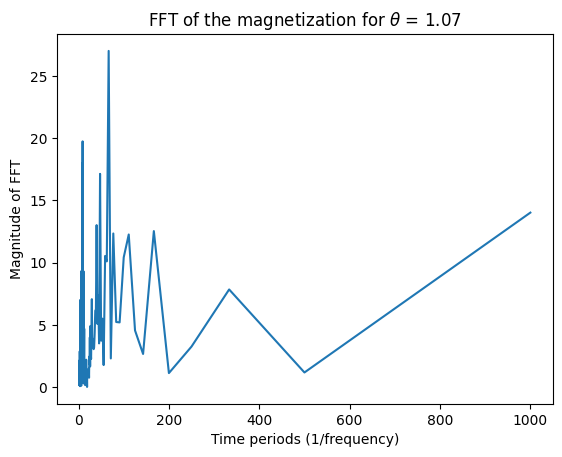

Prominent frequencies for theta =  0.97  are  [np.float64(0.01), np.float64(0.015), np.float64(0.024), np.float64(0.044), np.float64(0.113)]
Time periods for theta =  0.97  are  [100.          66.66666667  41.66666667  22.72727273   8.84955752]
Prominent Peak values for theta =  0.97  are  [np.float64(39.4846907986692), np.float64(12.899559099095915), np.float64(31.270970135499464), np.float64(13.361076600700265), np.float64(16.634686075206126)]


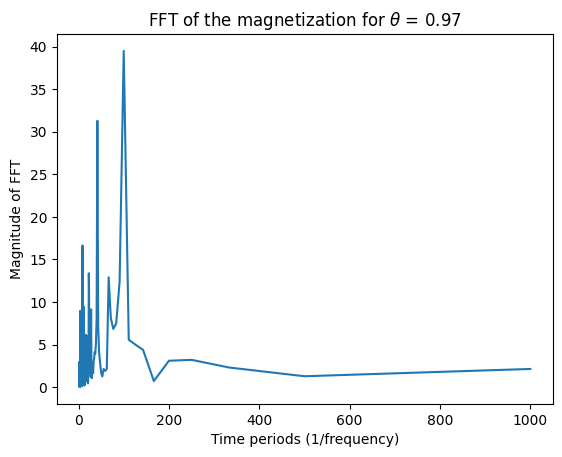

Prominent frequencies for theta =  0.87  are  [np.float64(0.002), np.float64(0.004), np.float64(0.007), np.float64(0.139)]
Time periods for theta =  0.87  are  [500.         250.         142.85714286   7.1942446 ]
Prominent Peak values for theta =  0.87  are  [np.float64(10.530240595493156), np.float64(12.569941725239936), np.float64(15.56018576766407), np.float64(13.554870733857019)]


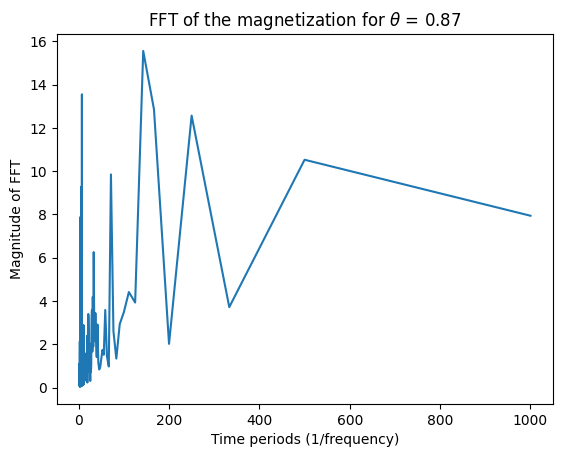

Prominent frequencies for theta =  0.77  are  [np.float64(0.134)]
Time periods for theta =  0.77  are  [7.46268657]
Prominent Peak values for theta =  0.77  are  [np.float64(11.694665435170206)]


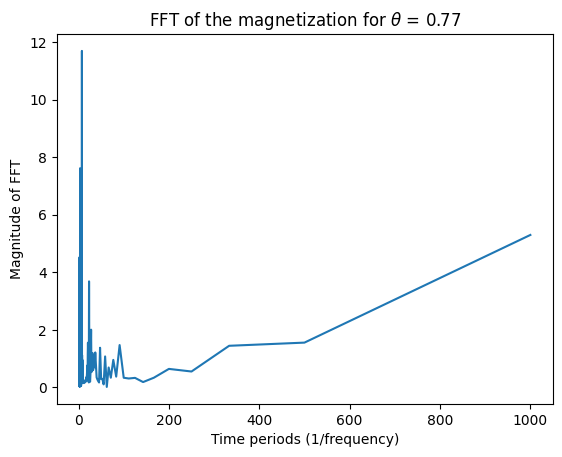

Prominent frequencies for theta =  0.67  are  [np.float64(0.011), np.float64(0.123), np.float64(0.276)]
Time periods for theta =  0.67  are  [90.90909091  8.1300813   3.62318841]
Prominent Peak values for theta =  0.67  are  [np.float64(10.862114990386226), np.float64(23.68205617691881), np.float64(20.749655700193106)]


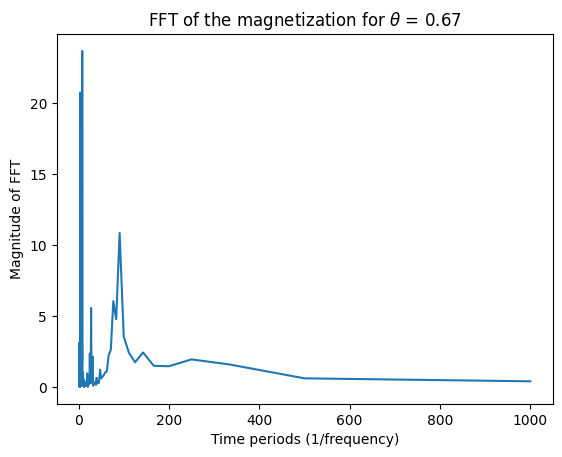

Prominent frequencies for theta =  0.57  are  [np.float64(0.008), np.float64(0.107), np.float64(0.243)]
Time periods for theta =  0.57  are  [125.           9.34579439   4.11522634]
Prominent Peak values for theta =  0.57  are  [np.float64(12.60382569515747), np.float64(47.52049403461047), np.float64(30.52471939841039)]


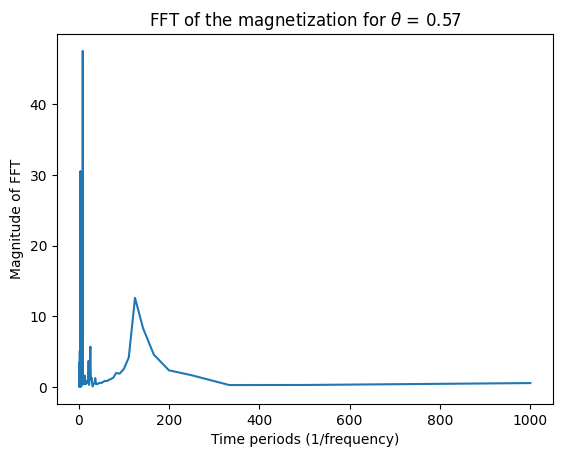

In [56]:
theta_list = [1.07,0.97, 0.87, 0.77, 0.67, 0.57]
theta_k = 0.52
max_trotter_steps = 1000

"""for i in range(max_trotter_steps):
    data = np.loadtxt(f"scaled_codes/data/N = {N}, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_TS.txt")
    sz_vals[i] = data[1]
    data = np.loadtxt(f"scaled_codes/data/N = {N}, theta = {theta}, theta_k = {theta_k}, t = {i}_sz.txt")
    sz_vals4[i] = data[1]



for i in range(max_trotter_steps):
    data3 = np.loadtxt(f"scaled_codes/data/N = 8, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_TS.txt")
    sz_vals3[i] = data3[1]"""
for theta in theta_list:
    for i in range(max_trotter_steps):
        data2 = np.loadtxt(f"../scaled_codes/data2/N = 6, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_tol.txt")
        sz_vals3[i] = data2[1]  

        #FFT to find out the frequency of the oscillations
    fft2 = fft(sz_vals3)
        #find list of frequencies

    freqs2 = np.fft.fftfreq(len(sz_vals3))
        #find the peaks
    peaks2, _ = find_peaks(np.abs(fft2))
    peaks2 = peaks2[freqs2[peaks2] > 0]

    #print("Peaks for theta_k = ",theta_k," are ",peaks) #print the peaks
    #print(freqs[peaks]) #print the frequencies with magnitude above 10

    #print the frequencies with magnitude above 10
    prom_freqs2 = [freqs2[i] for i in peaks2 if np.abs(fft2[i]) > 10]

    time_periods2 = 1/np.abs(prom_freqs2)

    #print("Peaks for theta_k = ",theta_k," are ",peaks) #print the peaks

    print("Prominent frequencies for theta = ",theta," are ",prom_freqs2) #print the prominent frequencies
    print("Time periods for theta = ",theta," are ",time_periods2) #print the time periods

    peak_vals2 = [np.abs(fft2[i]) for i in peaks2 if np.abs(fft2[i]) > 10] #find the prominent peak values

    print("Prominent Peak values for theta = ",theta," are ",peak_vals2) #print the peak values

    #Plot only the positive frequencies and the magnitudes at those frequencies

    freqs_pos2 = freqs2[freqs2 > 0]
    time_periods_2 = 1/freqs_pos2
    fft2_pos = fft2[freqs2 > 0]


        #plot the magnitudes wrt to the frequencies
    plt.plot(time_periods_2,np.abs(fft2_pos))
    plt.xlabel("Time periods (1/frequency)")
    plt.ylabel("Magnitude of FFT")
    plt.title(r"FFT of the magnetization for $\theta$ = " + str(theta))
    plt.show()

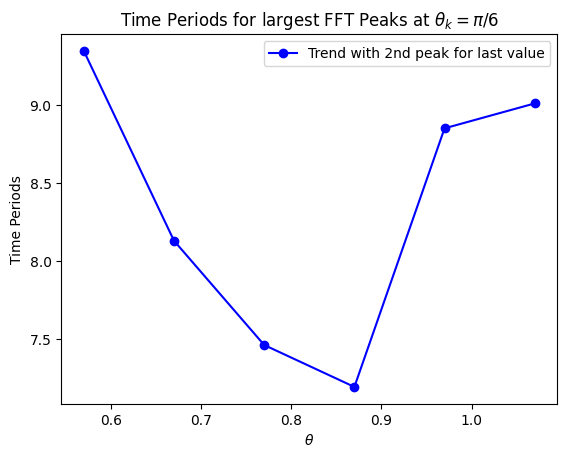

In [57]:
timeperiod_list2 = [9.00900901,8.84955752,7.1942446,7.4626,8.13,9.345]

#plt.plot(theta_k_list,timeperiod_list,'r',label = "Anomalous with max peaks")
plt.plot(theta_list,timeperiod_list2,'bo-',label = "Trend with 2nd peak for last value")
plt.xlabel(r"$\theta$")
plt.ylabel("Time Periods")
plt.legend()
plt.title("Time Periods for largest FFT Peaks at " + r"$\theta_k = \pi/6$")
plt.show()

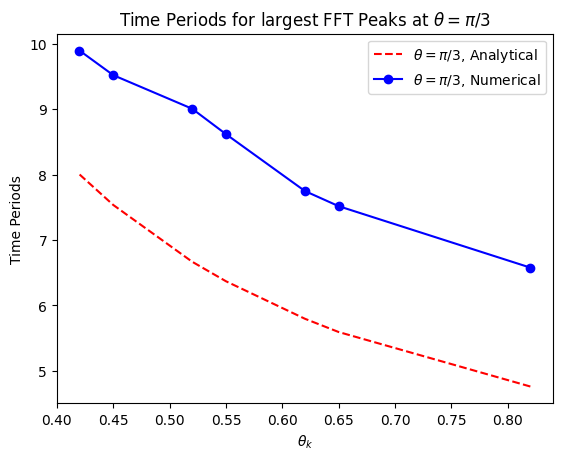

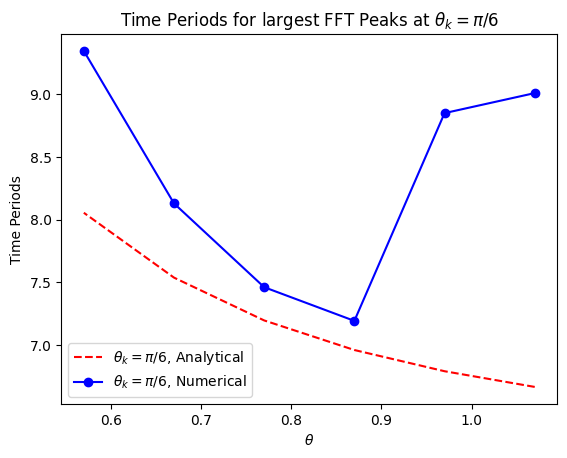

In [58]:
## Now, we see some values from the theoretical graph

timeperiod_list3 = [1/0.210141,1/0.178817,1/0.172541,1/0.157006,1/0.149969,1/0.132684,1/0.124919] #contant values for theta = 1.07
timeperiod_list4 = [1/0.149969,1/0.147208,1/0.143635,1/0.138933,1/0.132647,1/0.124137] #constant values for theta_k = 0.52

plt.plot(theta_k_list,timeperiod_list3,'r--',label = r"$\theta = \pi/3$, Analytical")
plt.plot(theta_k_list,timeperiod_list_2,'bo-',label = r"$\theta = \pi/3$, Numerical")
plt.xlabel(r"$\theta_k$")
plt.ylabel("Time Periods")
plt.legend()
plt.title("Time Periods for largest FFT Peaks at " + r"$\theta = \pi/3$")

plt.show()

plt.plot(theta_list,timeperiod_list4,'r--',label = r"$\theta_k = \pi/6$, Analytical")
plt.plot(theta_list,timeperiod_list2,'bo-',label = r"$\theta_k = \pi/6$, Numerical")
plt.xlabel(r"$\theta$")
plt.ylabel("Time Periods")
plt.legend()
plt.title("Time Periods for largest FFT Peaks at " + r"$\theta_k = \pi/6$")
plt.show()



In [59]:
w = 0.4128
def tk_col(theta,theta_k):
    return 2*theta*np.cos(theta)*np.exp(-np.pi*np.sin(theta)/theta_k)

Average of the magnetization values between for theta = 1.07 and theta_k = 0.52 is  -0.3968939322269988
Numerical tb is 3.2025764770737375
Analytical tb is 252.76762345911536


/var/folders/ys/hsq5k3zs70b8y915g7tk_yx00000gn/T/ipykernel_93918/1155835509.py:33: OptimizeWarning: Covariance of the parameters could not be estimated
  optimizedParameters1, pcov = opt.curve_fit(func, xdata, ydata)


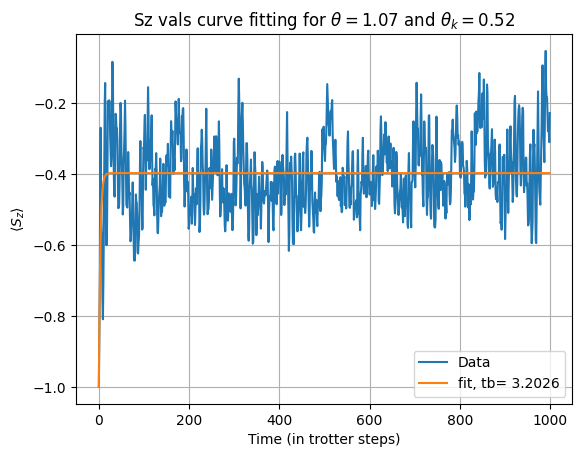

Average of the magnetization values between for theta = 0.97 and theta_k = 0.52 is  -0.46822899275762464
Numerical tb is 4.410291010302416
Analytical tb is 172.64138127662017


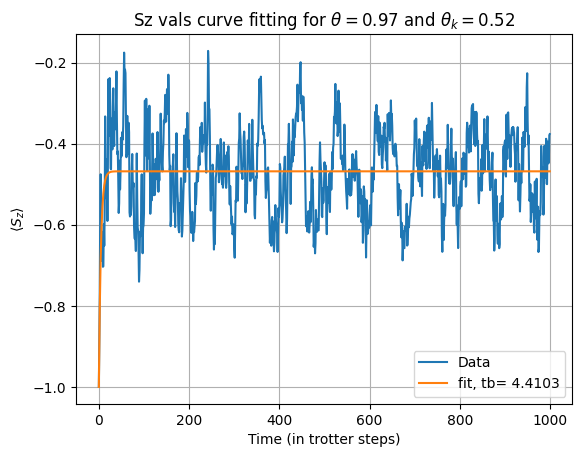

Average of the magnetization values between for theta = 0.87 and theta_k = 0.52 is  -0.577514852851893
Numerical tb is 11.576555268018579
Analytical tb is 117.04266158341261


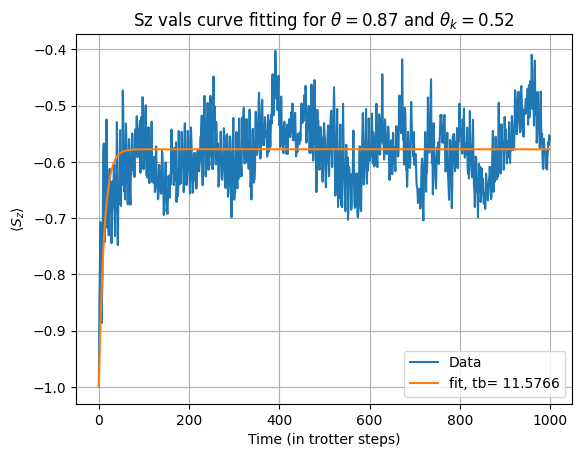

Average of the magnetization values between for theta = 0.77 and theta_k = 0.52 is  -0.8079997195398919
Numerical tb is 0.8228130114652592
Analytical tb is 78.6717019122484


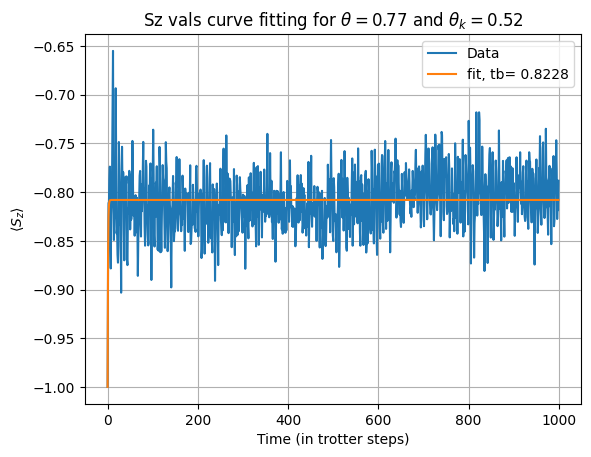

Average of the magnetization values between for theta = 0.67 and theta_k = 0.52 is  -0.7509421031160395
Numerical tb is 1.7106010525177477
Analytical tb is 52.59094255862123


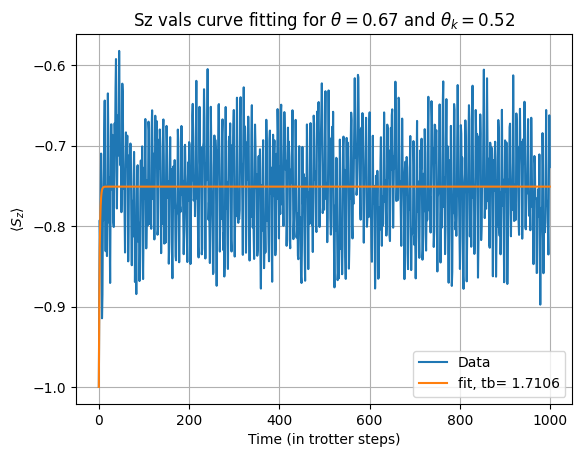

Average of the magnetization values between for theta = 0.57 and theta_k = 0.52 is  -0.7303104778042391
Numerical tb is 1.2171411336064288
Analytical tb is 35.20550951677035


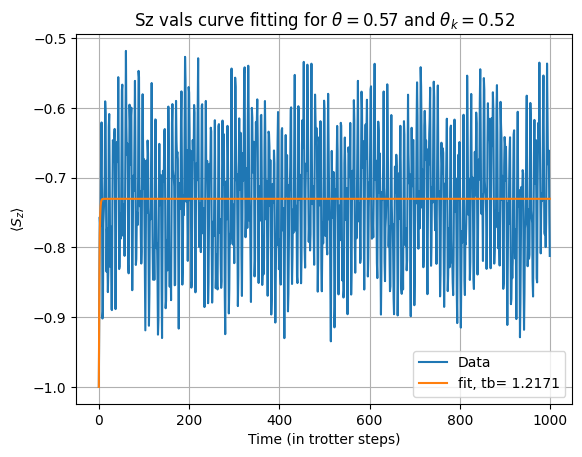

In [60]:
## Let us plot the magnetization for the theta_k = 0.52 case

#Let us find the numerical decay rate of the magnetization

#Fir we have to find the average of the magnetization values from t1 to t2

t1 = 100
t2 = 1000
numerical_tb_list1 = []
analytical_tb_list1 = []


theta_k = 0.52

for theta in theta_list:
    sz_vals = []
    

    for i in range(t2):
        data = np.loadtxt(f"../scaled_codes/data2/N = 6, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_tol.txt")
        sz_vals.append(data[1])

    #Find the average of the magnetization values between t1 and t2

    avg = np.mean(sz_vals[t1:t2])
    print(f"Average of the magnetization values between for theta = {theta} and theta_k = {theta_k} is ",avg)
    xdata = np.array(list(range(t2)))
    ydata = np.array(sz_vals)

    def func(x, b, a , w, phi):
        return (-1-avg)*np.exp(-x/b) + avg #+ (a*np.sin(w*x + phi))

    optimizedParameters1, pcov = opt.curve_fit(func, xdata, ydata)

    # Use the optimized parameters to plot the best fit
    plt.plot(xdata, ydata, "-", label="Data")
    plt.plot(xdata, func(xdata, *optimizedParameters1), label="fit, tb= {}".format(round(optimizedParameters1[0],4)))

    print("Numerical tb is",optimizedParameters1[0])
    numerical_tb_list1.append(optimizedParameters1[0])
    analytical_tb = w*np.pi/tk_col(theta,theta_k)

    print("Analytical tb is",analytical_tb)
    analytical_tb_list1.append(analytical_tb)

    # Show the graph
    plt.legend()
    plt.title("Sz vals curve fitting for " + r"$\theta = $" + f"{theta}" + " and " + r"$\theta_k = $" +  f"{theta_k}")
    plt.ylabel(r"$\langle S_z \rangle$")
    plt.xlabel(r"Time (in trotter steps)")
    #plt.ticklabel_format(axis='both', style='sci', scilimits=(-4,0))
    plt.grid()
    plt.show()

Average of the magnetization values between for theta = 1.07 and theta_k = 0.82 is  -0.3766113678767438
Numerical tb is 1.2425834868796632
Analytical tb is 36.36410709373461


/var/folders/ys/hsq5k3zs70b8y915g7tk_yx00000gn/T/ipykernel_93918/2621173246.py:21: OptimizeWarning: Covariance of the parameters could not be estimated
  optimizedParameters1, pcov = opt.curve_fit(func, xdata, ydata)


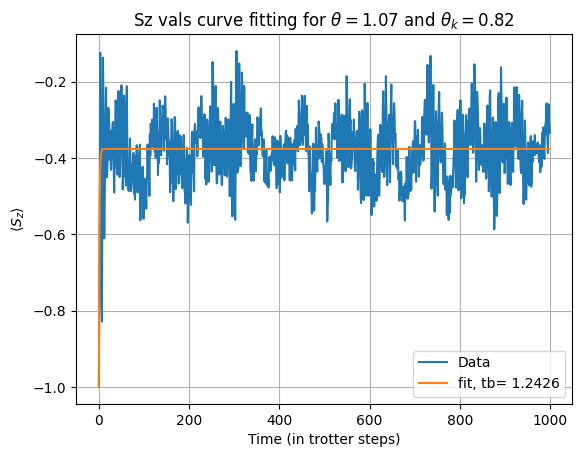

Average of the magnetization values between for theta = 1.07 and theta_k = 0.65 is  -0.3258947512522477
Numerical tb is 3.791875524850413
Analytical tb is 87.57932410340248


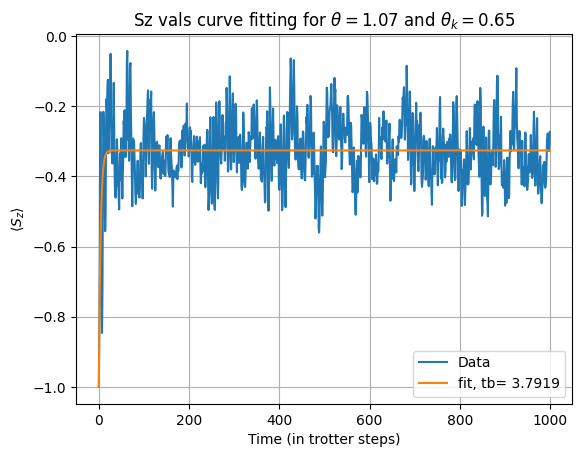

Average of the magnetization values between for theta = 1.07 and theta_k = 0.62 is  -0.3404451526345397
Numerical tb is 3.651196277117006
Analytical tb is 107.52160903329623


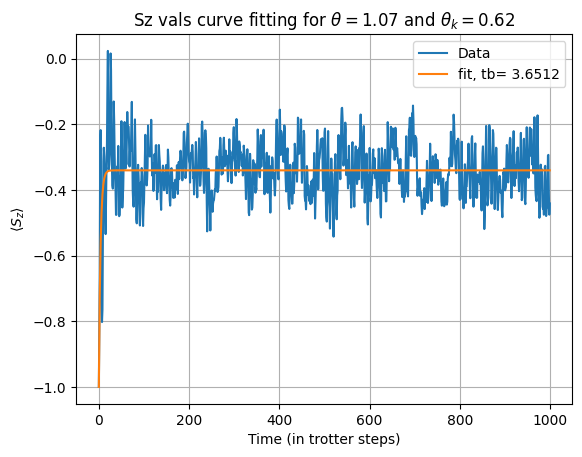

Average of the magnetization values between for theta = 1.07 and theta_k = 0.55 is  -0.3851484827962646
Numerical tb is 3.1604391817053124
Analytical tb is 189.31266372830447


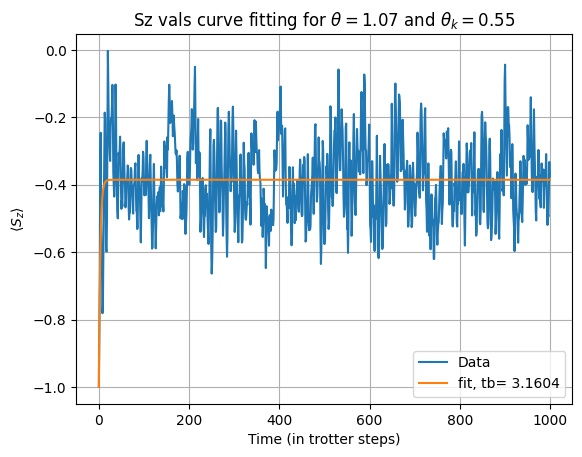

Average of the magnetization values between for theta = 1.07 and theta_k = 0.52 is  -0.3968939322269988
Numerical tb is 3.2025764770737375
Analytical tb is 252.76762345911536


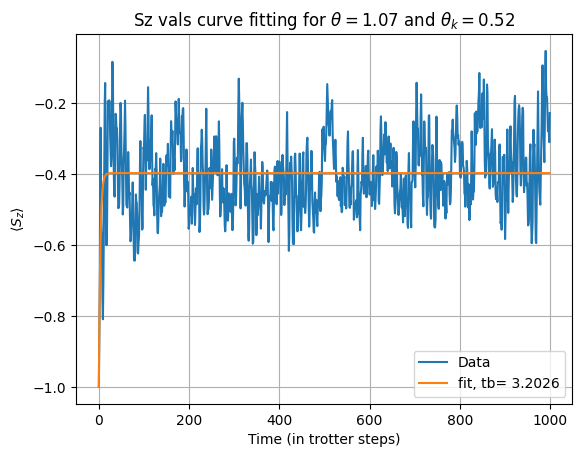

Average of the magnetization values between for theta = 1.07 and theta_k = 0.45 is  -0.44840076450213556
Numerical tb is 2.5759388995100463
Analytical tb is 576.431890710391


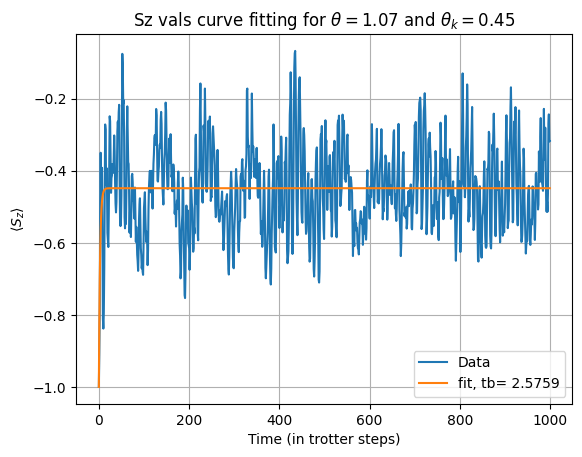

Average of the magnetization values between for theta = 1.07 and theta_k = 0.42 is  -0.47017512063582995
Numerical tb is 2.442114460572899
Analytical tb is 892.7323523632931


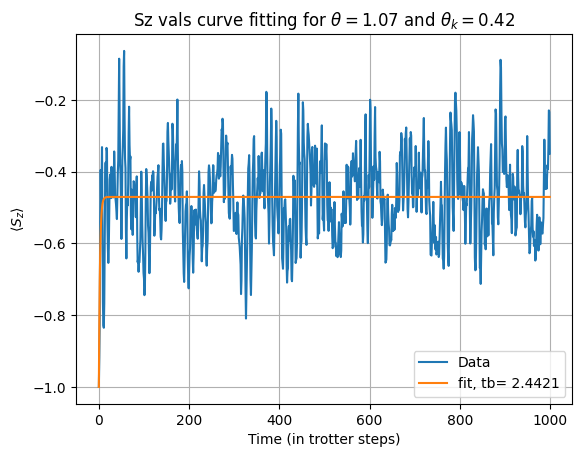

In [61]:
theta = 1.07

for theta_k in theta_k_list:
    sz_vals = []
    

    for i in range(t2):
        data = np.loadtxt(f"../scaled_codes/data2/N = 6, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_tol.txt")
        sz_vals.append(data[1])

    #Find the average of the magnetization values between t1 and t2

    avg = np.mean(sz_vals[t1:t2])
    print(f"Average of the magnetization values between for theta = {theta} and theta_k = {theta_k} is ",avg)
    xdata = np.array(list(range(t2)))
    ydata = np.array(sz_vals)

    def func(x, b, a , w, phi):
        return (-1-avg)*np.exp(-x/b) + avg #+ (a*np.sin(w*x + phi))

    optimizedParameters1, pcov = opt.curve_fit(func, xdata, ydata)

    # Use the optimized parameters to plot the best fit
    plt.plot(xdata, ydata, "-", label="Data")
    plt.plot(xdata, func(xdata, *optimizedParameters1), label="fit, tb= {}".format(round(optimizedParameters1[0],4)))

    print("Numerical tb is",optimizedParameters1[0])
    numerical_tb_list1.append(optimizedParameters1[0])
    analytical_tb = w*np.pi/tk_col(theta,theta_k)

    print("Analytical tb is",analytical_tb)
    analytical_tb_list1.append(analytical_tb)

    # Show the graph
    plt.legend()
    plt.title("Sz vals curve fitting for " + r"$\theta = $" + f"{theta}" + " and " + r"$\theta_k = $" +  f"{theta_k}")
    plt.ylabel(r"$\langle S_z \rangle$")
    plt.xlabel(r"Time (in trotter steps)")
    #plt.ticklabel_format(axis='both', style='sci', scilimits=(-4,0))
    plt.grid()
    plt.show()

Prominent frequencies for theta_k =  0.79  are  []
Time periods for theta_k =  0.79  are  []
Prominent Peak values for theta_k =  0.79  are  []


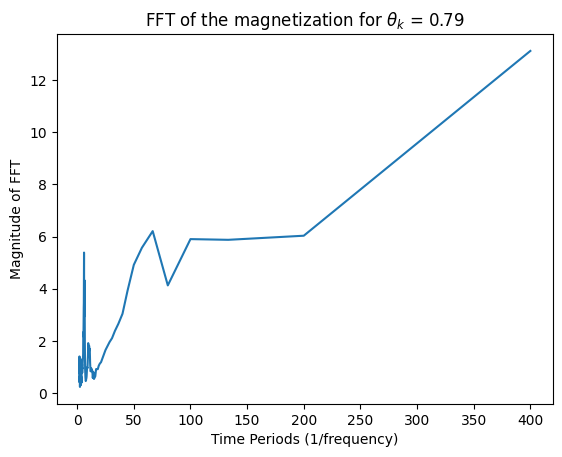

Prominent frequencies for theta_k =  0.52  are  [np.float64(0.01), np.float64(0.11), np.float64(0.115)]
Time periods for theta_k =  0.52  are  [100.           9.09090909   8.69565217]
Prominent Peak values for theta_k =  0.52  are  [np.float64(8.362317302476296), np.float64(9.170486804752965), np.float64(9.68722363861973)]


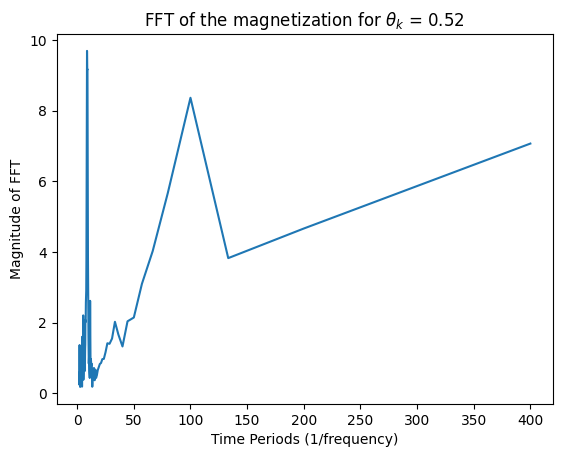

In [62]:
N = 10
theta = 1.07 #pass the true values here
theta_k_list = [0.79,0.52]
max_trotter_steps = 400

#i = 0

sz_vals = [0]*max_trotter_steps 
sz_vals2 = [0]*max_trotter_steps
sz_vals3 = [0]*max_trotter_steps
sz_vals4 = [0]*max_trotter_steps
sz_vals5 = [0]*max_trotter_steps

"""for i in range(max_trotter_steps):
    data = np.loadtxt(f"scaled_codes/data/N = {N}, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_TS.txt")
    sz_vals[i] = data[1]
    data = np.loadtxt(f"scaled_codes/data/N = {N}, theta = {theta}, theta_k = {theta_k}, t = {i}_sz.txt")
    sz_vals4[i] = data[1]



for i in range(max_trotter_steps):
    data3 = np.loadtxt(f"scaled_codes/data/N = 8, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_TS.txt")
    sz_vals3[i] = data3[1]"""
for theta_k in theta_k_list:
    for i in range(max_trotter_steps):
        data2 = np.loadtxt(f"../scaled_codes/data2/N = 10, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_tol.txt")
        sz_vals2[i] = data2[1]  

        #FFT to find out the frequency of the oscillations
    fft1 = fft(sz_vals2)
        #find list of frequencies

    freqs = np.fft.fftfreq(len(sz_vals2))
        #find the peaks
    peaks, _ = find_peaks(np.abs(fft1))
    peaks = peaks[freqs[peaks] > 0]

    #print("Peaks for theta_k = ",theta_k," are ",peaks) #print the peaks
    #print(freqs[peaks]) #print the frequencies with magnitude above 10

    #print the frequencies with magnitude above 10
    prom_freqs = [freqs[i] for i in peaks if np.abs(fft1[i]) > 8]

    time_periods = 1/np.abs(prom_freqs)

    #print("Peaks for theta_k = ",theta_k," are ",peaks) #print the peaks

    print("Prominent frequencies for theta_k = ",theta_k," are ",prom_freqs) #print the prominent frequencies
    print("Time periods for theta_k = ",theta_k," are ",time_periods) #print the time periods

    peak_vals = [np.abs(fft1[i]) for i in peaks if np.abs(fft1[i]) > 8] #find the prominent peak values

    print("Prominent Peak values for theta_k = ",theta_k," are ",peak_vals) #print the peak values

    #Plot only the positive frequencies and the magnitudes at those frequencies

    freqs_pos = freqs[freqs > 0]
    time_periods_1 = 1/freqs_pos
    fft1_pos = fft1[freqs > 0]

    plt.plot(time_periods_1,np.abs(fft1_pos))
    plt.xlabel("Time Periods (1/frequency)")
    plt.ylabel("Magnitude of FFT")
    plt.title(r"FFT of the magnetization for $\theta_k$ = " + str(theta_k))
    plt.show()

In [63]:
def non_int_matrix(N,theta,theta_k):
    mat = np.zeros((N+1,N+1),dtype = float)
    for i in range(N+1):
        for j in range(N+1):
            if i == 0 and j == 1:
                mat[i][j] = theta_k
            elif i == 1:
                if j == 0:
                    mat[i][j] = theta_k
                elif j == 2:
                    mat[i][j] = theta
                elif j == N:
                    mat[i][j] = theta
            elif i == N:
                if j == 1:
                    mat[i][j] = theta
                elif j == N - 1:
                    mat[i][j] = theta
            else:
                if i == j + 1 or i == j - 1:
                    mat[i][j] = theta

    return mat


In [102]:
def eigvals_non_int(N,theta,theta_k):
    mat = non_int_matrix(N,theta,theta_k)
    eigvals,eigvecs = np.linalg.eigh(mat)

    #Now sort the eigenvals in ascending order, and bring the same ordering for the eigenvectors
    idx = eigvals.argsort()
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:,idx]
    gap = eigvals[N//2] - eigvals[N//2 - 1]
    #print("Energy gaps for theta = ",theta," and theta_k = ",theta_k," is ",gap)
    return (eigvals,eigvecs,gap)

In [65]:
def parity_check(N,theta,theta_k):
    eigvals,eigvecs,gap = eigvals_non_int(N,theta,theta_k)
    zero_state = np.zeros(N+1)
    zero_state[0] = 1
    parity = 0
    for i in range(N//2 - 1):
        parity += np.dot(eigvecs[:,i],zero_state)**2
    
    parity_g = parity + np.dot(eigvecs[:,N//2-1],zero_state)**2
    print("Parity for ground state with theta = ",theta," and theta_k = ",theta_k," is ",parity_g - 0.5)
    parity_e = parity + np.dot(eigvecs[:,N//2],zero_state)**2
    print("Parity for first excited state with theta = ",theta," and theta_k = ",theta_k," is ",parity_e - 0.5)

In [66]:
# Let us first code up the before quench matrix

def before_quench_mat(N,theta,v):
    mat = np.zeros((N+1,N+1),dtype = float)
    for i in range(N+1):
        for j in range(N+1):
            if i == 0 and j == 1:
                mat[i][j] = 0
            elif i == 1:
                if j == 0:
                    mat[i][j] = 0
                elif j == 1:
                    mat[i][j] = v
                elif j == 2:
                    mat[i][j] = theta
                elif j == N:
                    mat[i][j] = theta
            elif i == N:
                if j == 1:
                    mat[i][j] = theta
                elif j == N - 1:
                    mat[i][j] = theta
            else:
                if i == j + 1 or i == j - 1:
                    mat[i][j] = theta

    return mat



In [67]:
print(before_quench_mat(8,1.07,0.52))

[[0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.52 1.07 0.   0.   0.   0.   0.   1.07]
 [0.   1.07 0.   1.07 0.   0.   0.   0.   0.  ]
 [0.   0.   1.07 0.   1.07 0.   0.   0.   0.  ]
 [0.   0.   0.   1.07 0.   1.07 0.   0.   0.  ]
 [0.   0.   0.   0.   1.07 0.   1.07 0.   0.  ]
 [0.   0.   0.   0.   0.   1.07 0.   1.07 0.  ]
 [0.   0.   0.   0.   0.   0.   1.07 0.   1.07]
 [0.   1.07 0.   0.   0.   0.   0.   1.07 0.  ]]


In [103]:
def eigvals_non_int2(N,theta,v):
    mat = before_quench_mat(N,theta,v)
    eigvals,eigvecs = np.linalg.eigh(mat)

    #Now sort the eigenvals in ascending order, and bring the same ordering for the eigenvectors
    idx = eigvals.argsort()
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:,idx]
    gap = eigvals[N//2] - eigvals[N//2 - 1]
    #print("Energy gaps for theta = ",theta," and theta_k = ",theta_k," (before quench) is ",gap)
    return (eigvals,eigvecs,gap)

In [70]:
test_vals,test_vecs,gap = eigvals_non_int2(8,1.07,0.52)
print(test_vecs[:,3])

Energy gaps for theta =  1.07  and theta_k =  0.52  is  1.8808016177114698e-17
[ 0.00000000e+00 -1.57691562e-16 -5.00000000e-01  1.87146134e-16
  5.00000000e-01 -1.57691562e-16 -5.00000000e-01  1.28236990e-16
  5.00000000e-01]


In [71]:
## now, the idea is to make a function, that takes in eigenvectors before quench, and gives its decomposition in the eigenbasis after quench (essentially the coeffs of the eigenvectors after quench in the eigenbasis before quench)

def eigvecs_decomp(N,theta,v,theta_k):
    eigvals,eigvecs,gap = eigvals_non_int2(N,theta,v)
    eigvals2,eigvecs2,gap2 = eigvals_non_int(N,theta,theta_k)
    decomp = np.zeros((N+1,N+1),dtype = float)
    for i in range(N+1):
        for j in range(N+1):
            decomp[i][j] = np.dot(eigvecs[:,i],eigvecs2[:,j])
    return decomp

In [73]:
## Let us check if the decomposition matrix is correct

decomp_mat = eigvecs_decomp(8,1.07,0.52,0.52)

eigvals,eigvecs,gap = eigvals_non_int2(8,1.07,0.52)
eigvals2,eigvecs2,gap2 = eigvals_non_int(8,1.07,0.52)

i = 2

#print(np.dot(eigvecs[:,i],eigvecs[:,i+1]))

state = 0
for j in range(9):
    state += decomp_mat[i][j]*eigvecs2[:,j]

print(state)
print(eigvecs[:,i])



Energy gaps for theta =  1.07  and theta_k =  0.52  is  1.8808016177114698e-17
Energy gaps for theta =  1.07  and theta_k =  0.52  is  0.25068732256331583
Energy gaps for theta =  1.07  and theta_k =  0.52  is  1.8808016177114698e-17
Energy gaps for theta =  1.07  and theta_k =  0.52  is  0.25068732256331583
2.0175608356876782e-16
[-7.61109925e-17 -4.62097915e-01  4.12795959e-01 -7.47991783e-02
 -3.15509490e-01  4.85162033e-01 -3.15509490e-01 -7.47991783e-02
  4.12795959e-01]
[ 0.         -0.46209792  0.41279596 -0.07479918 -0.31550949  0.48516203
 -0.31550949 -0.07479918  0.41279596]


In [74]:
## We have the correct decomposition matrix. Now we have to look at the time evolution of the state. Before that, let us check the initial parity of the state

def parity_check2(N,theta,v):
    eigvals,eigvecs,gap = eigvals_non_int2(N,theta,v)
    zero_state = np.zeros(N+1)
    zero_state[0] = 1
    parity = 0
    for i in range(N//2 - 1):
        parity += np.dot(eigvecs[:,i],zero_state)**2
    
    parity_g = parity + np.dot(eigvecs[:,N//2-1],zero_state)**2
    print("Parity for ground state with theta = ",theta," and theta_k = ",theta_k," is ",parity_g - 0.5)
    parity_e = parity + np.dot(eigvecs[:,N//2],zero_state)**2
    print("Parity for first excited state with theta = ",theta," and theta_k = ",theta_k," is ",parity_e - 0.5)

In [75]:
parity_check2(8,1.07,0.52)

Energy gaps for theta =  1.07  and theta_k =  0.52  is  1.8808016177114698e-17
Parity for ground state with theta =  1.07  and theta_k =  0.52  is  -0.5
Parity for first excited state with theta =  1.07  and theta_k =  0.52  is  0.5


In [84]:
def Sz_calc(N,theta,v,theta_k,t):
    eigvals,eigvecs,gap = eigvals_non_int2(N,theta,v)
    eigvals2,eigvecs2,gap2 = eigvals_non_int(N,theta,theta_k)
    decomp = eigvecs_decomp(N,theta,v,theta_k)
    state_list = [0]*(N+1)
    for i in range(N+1):
        for j in range(N+1):
            state_list[i] += np.exp(-1j*eigvals2[j]*t)*decomp[i][j]*eigvecs2[:,j]



    ## Now, we have the state at time t. Let us calculate the expectation value of Sz
    zero_state = np.zeros(N+1)
    zero_state[0] = 1

    parity = 0
    for i in range(N//2 - 1):
        parity += np.abs(np.dot(state_list[i],zero_state))**2

    parity_g = parity + np.abs(np.dot(state_list[N//2-1],zero_state))**2
    sz_val = parity_g - 0.5
    return 2*sz_val

In [89]:
print(Sz_calc(8,1.07,0.79,0.79,0))

Energy gaps for theta =  1.07  and theta_k =  0.52  (before quench) is  2.8800506790320095e-18
Energy gaps for theta =  1.07  and theta_k =  0.79  is  0.36367092203677953
Energy gaps for theta =  1.07  and theta_k =  0.52  (before quench) is  2.8800506790320095e-18
Energy gaps for theta =  1.07  and theta_k =  0.79  is  0.36367092203677953
0.9999999999999973


In [202]:
##Let us plot this magnetization over some time steps

def plot_Sz(N,theta,v,theta_k):
    max_trotter_steps = 1000
    sz_vals = []
    c = 1
    if Sz_calc(N,theta,v,theta_k,0) > 0:
        c = -1
    for i in range(max_trotter_steps):
        sz_vals.append(c*Sz_calc(N,theta,v,theta_k,i))
    plt.plot(list(range(max_trotter_steps)),sz_vals)
    plt.xlabel("Time (in trotter steps)")
    plt.ylabel(r"$\langle S_z \rangle$")
    plt.title(r"$\langle S_z \rangle$ vs time for" +  f" N = {N}, " +  r"$\theta = $" + f"{round(theta,2)}" + " and " + r"$\theta_k = $" + f"{round(theta_k,2)}")
    plt.show()

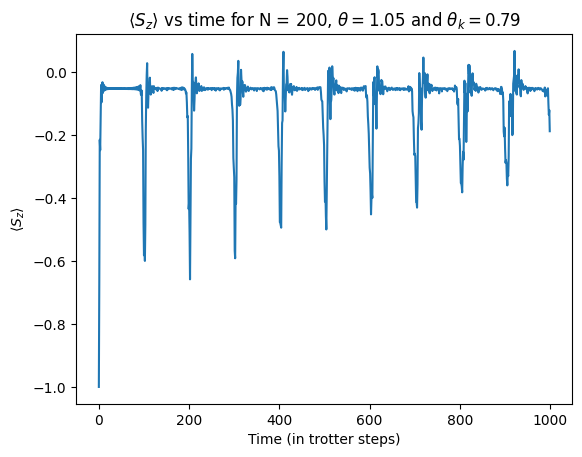

In [203]:
plot_Sz(200,np.pi/3,np.pi/3,np.pi/4)

In [204]:
## Let us also form the anti-periodic boundary system, and compare our plots with numerical data (compare time periods and asymptotic values)

def non_int_matrix_anti(N,theta,theta_k):
    mat = np.zeros((N+1,N+1),dtype = float)
    for i in range(N+1):
        for j in range(N+1):
            if i == 0 and j == 1:
                mat[i][j] = theta_k
            elif i == 1:
                if j == 0:
                    mat[i][j] = theta_k
                elif j == 2:
                    mat[i][j] = theta
                elif j == N:
                    mat[i][j] = -theta
            elif i == N:
                if j == 1:
                    mat[i][j] = -theta
                elif j == N - 1:
                    mat[i][j] = theta
            else:
                if i == j + 1 or i == j - 1:
                    mat[i][j] = theta

    return mat

def eigvals_non_int_anti(N,theta,theta_k):
    mat = non_int_matrix_anti(N,theta,theta_k)
    eigvals,eigvecs = np.linalg.eigh(mat)

    #Now sort the eigenvals in ascending order, and bring the same ordering for the eigenvectors
    idx = eigvals.argsort()
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:,idx]
    gap = eigvals[N//2] - eigvals[N//2 - 1]
    #print("Energy gaps for theta = ",theta," and theta_k = ",theta_k," is ",gap)
    return (eigvals,eigvecs,gap)

def before_quench_mat_anti(N,theta,v):
    mat = np.zeros((N+1,N+1),dtype = float)
    for i in range(N+1):
        for j in range(N+1):
            if i == 0 and j == 1:
                mat[i][j] = 0
            elif i == 1:
                if j == 0:
                    mat[i][j] = 0
                elif j == 1:
                    mat[i][j] = v
                elif j == 2:
                    mat[i][j] = theta
                elif j == N:
                    mat[i][j] = -theta
            elif i == N:
                if j == 1:
                    mat[i][j] = -theta
                elif j == N - 1:
                    mat[i][j] = theta
            else:
                if i == j + 1 or i == j - 1:
                    mat[i][j] = theta

    return mat

def eigvals_non_int_anti2(N,theta,v):
    mat = before_quench_mat_anti(N,theta,v)
    eigvals,eigvecs = np.linalg.eigh(mat)

    #Now sort the eigenvals in ascending order, and bring the same ordering for the eigenvectors
    idx = eigvals.argsort()
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:,idx]
    gap = eigvals[N//2] - eigvals[N//2 - 1]
    #print("Energy gaps for theta = ",theta," and theta_k = ",theta_k," (before quench) is ",gap)
    return (eigvals,eigvecs,gap)

def eigvecs_decomp_anti(N,theta,v,theta_k):
    eigvals,eigvecs,gap = eigvals_non_int_anti2(N,theta,v)
    eigvals2,eigvecs2,gap2 = eigvals_non_int_anti(N,theta,theta_k)
    decomp = np.zeros((N+1,N+1),dtype = float)
    for i in range(N+1):
        for j in range(N+1):
            decomp[i][j] = np.dot(eigvecs[:,i],eigvecs2[:,j])
    return decomp

def Sz_calc_anti(N,theta,v,theta_k,t):
    eigvals,eigvecs,gap = eigvals_non_int_anti2(N,theta,v)
    eigvals2,eigvecs2,gap2 = eigvals_non_int_anti(N,theta,theta_k)
    decomp = eigvecs_decomp_anti(N,theta,v,theta_k)
    state_list = [0]*(N+1)
    for i in range(N+1):
        for j in range(N+1):
            state_list[i] += np.exp(-1j*eigvals2[j]*t)*decomp[i][j]*eigvecs2[:,j]



    ## Now, we have the state at time t. Let us calculate the expectation value of Sz
    zero_state = np.zeros(N+1)
    zero_state[0] = 1

    parity = 0
    for i in range(N//2 - 1):
        parity += np.abs(np.dot(state_list[i],zero_state))**2

    parity_g = parity + np.abs(np.dot(state_list[N//2-1],zero_state))**2
    sz_val = parity_g - 0.5
    return 2*sz_val

def plot_Sz_anti(N,theta,v,theta_k):
    max_trotter_steps = 1000
    sz_vals = []
    c = 1
    if Sz_calc_anti(N,theta,v,theta_k,0) > 0:
        c = -1
    for i in range(max_trotter_steps):
        sz_vals.append(c*Sz_calc_anti(N,theta,v,theta_k,i))
    plt.plot(list(range(max_trotter_steps)),sz_vals)
    plt.xlabel("Time (in trotter steps)")
    plt.ylabel(r"$\langle S_z \rangle$")
    plt.title(r"$\langle S_z \rangle$ vs time for" +  f" N = {N}, " +  r"$\theta = $" + f"{round(theta,2)}" + " and " + r"$\theta_k = $" + f"{round(theta_k,2)}")
    plt.show()

In [133]:
print(Sz_calc_anti(30,1.07,0.79,0.79,0))

-1.0


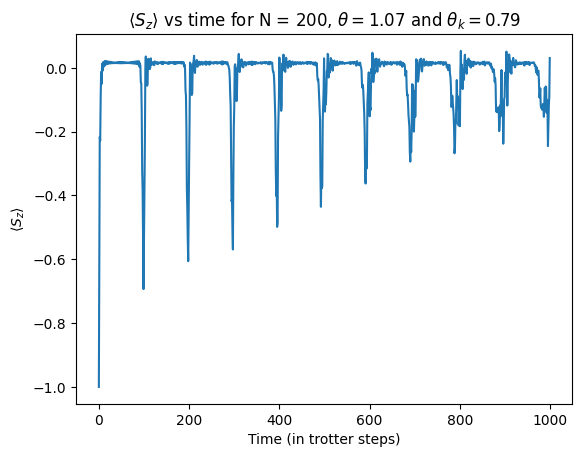

In [136]:
plot_Sz_anti(200,1.07,0.79,0.79)

In [211]:
def plot_Sz_comp(N1,N2,theta,v,theta_k):
    max_trotter_steps = 1000
    sz_vals_num = [0]*max_trotter_steps
    for i in range(max_trotter_steps):
        data = np.loadtxt(f"../scaled_codes/data2/N = {N2}, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_tol.txt")
        sz_vals_num[i] = data[1]

    fft1 = fft(sz_vals_num)

    avg_num = np.mean(sz_vals_num[100:1000])
        #find list of frequencies

    freqs = np.fft.fftfreq(len(sz_vals_num))
        #find the peaks
    peaks, _ = find_peaks(np.abs(fft1))
    peaks = peaks[freqs[peaks] > 0]

    #print("Peaks for theta_k = ",theta_k," are ",peaks) #print the peaks
    #print(freqs[peaks]) #print the frequencies with magnitude above 10

    #print the frequencies with magnitude above 10
    prom_freqs = [freqs[i] for i in peaks if np.abs(fft1[i]) > 8]

    time_periods = 1/np.abs(prom_freqs)
    print("Time periods (numerical) for theta_k = ",theta_k," are ",time_periods) #print the time periods

    sz_vals_an = []
    c = 1
    if Sz_calc_anti(N1,theta,v,theta_k,0) > 0:
        c = -1
    for i in range(max_trotter_steps):
        sz_vals_an.append(c*Sz_calc_anti(N1,theta,v,theta_k,i))

    fft2 = fft(sz_vals_an)
    freqs2 = np.fft.fftfreq(len(sz_vals_an))
        #find the peaks
    peaks2, _ = find_peaks(np.abs(fft2))
    peaks2 = peaks2[freqs2[peaks2] > 0]

    #print("Peaks for theta_k = ",theta_k," are ",peaks) #print the peaks
    #print(freqs[peaks]) #print the frequencies with magnitude above 10

    #print the frequencies with magnitude above 10
    prom_freqs2 = [freqs2[i] for i in peaks2 if np.abs(fft2[i]) > 8]

    time_periods2 = 1/np.abs(prom_freqs2)
    print("Time periods (analytical) for theta_k = ",theta_k," are ",time_periods2) #print the time periods
    peak_vals2 = [np.abs(fft2[i]) for i in peaks2 if np.abs(fft2[i]) > 8] #find the prominent peak values

    print("Prominent Peak values (analytical) for theta = ",theta, "theta_k = ",theta_k," are ",peak_vals2) #print the peak values


    avg_an = np.mean(sz_vals_an[100:1000])

    print("Numerical asymptote is ",avg_num)
    print("Analytical asymptote is ",avg_an)
    plt.plot(list(range(max_trotter_steps)),sz_vals_an,'b-',label = "Analytical (N1)")
    plt.plot(list(range(max_trotter_steps)),sz_vals_num,'r--',label = "Numerical (N2)")
    plt.xlabel("Time (in trotter steps)")
    plt.ylabel(r"$\langle S_z \rangle$")
    plt.legend()
    plt.title(r"$\langle S_z \rangle$ vs time for" +  f" N1 = {N1}, N2 = {N2}, " +  r"$\theta = $" + f"{round(theta,2)}" + " and " + r"$\theta_k = $" + f"{round(theta_k,2)}")
    plt.show()
    

Time periods (numerical) for theta_k =  0.79  are  [100.          66.66666667   6.55737705   6.06060606]
Time periods (analytical) for theta_k =  0.79  are  [57.14285714 26.66666667 18.18181818 13.33333333]
Prominent Peak values (analytical) for theta =  1.07 theta_k =  0.79  are  [np.float64(15.522458317814824), np.float64(15.677184650996978), np.float64(9.282668330815175), np.float64(8.470669229806074)]
Numerical asymptote is  -0.15780979376512977
Analytical asymptote is  -0.15915341603419322


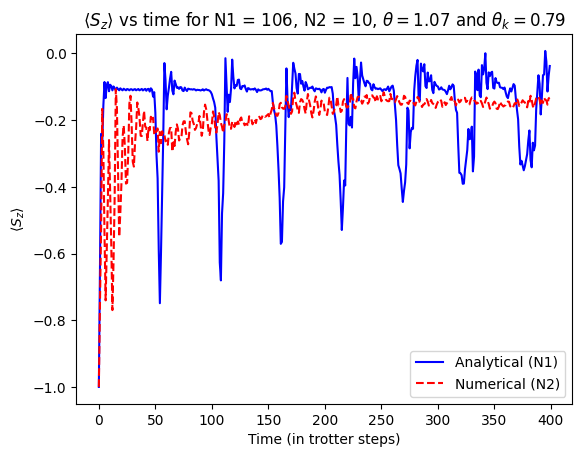

In [198]:
plot_Sz_comp(106,10,1.07,0.79,0.79)

Time periods (numerical) for theta_k =  0.42  are  [111.11111111  55.55555556  32.25806452  12.5         12.04819277
  11.23595506  10.41666667  10.20408163   9.9009901    5.34759358
   3.47222222]
Time periods (analytical) for theta_k =  0.42  are  [3.81679389 2.95857988]
Prominent Peak values (analytical) for theta =  1.07 theta_k =  0.42  are  [np.float64(23.54420357550157), np.float64(10.142559268187167)]
Numerical asymptote is  -0.47017512063582995
Analytical asymptote is  -0.9464628829571119


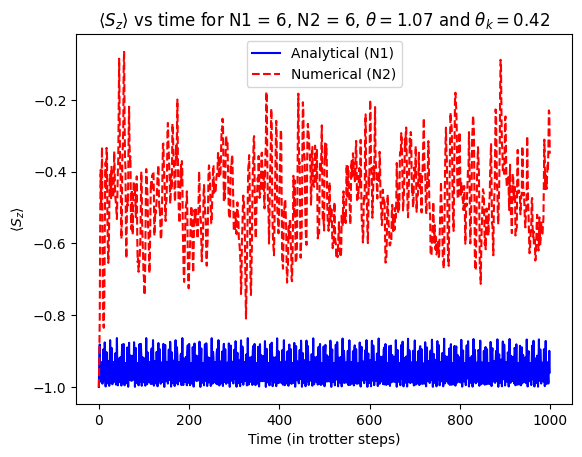

Time periods (numerical) for theta_k =  0.45  are  [100.          52.63157895  12.65822785  11.9047619   11.49425287
  10.63829787  10.           9.80392157   9.52380952   5.43478261
   3.46020761]
Time periods (analytical) for theta_k =  0.45  are  [3.84615385 2.93255132]
Prominent Peak values (analytical) for theta =  1.07 theta_k =  0.45  are  [np.float64(24.275718739416646), np.float64(9.435456007655091)]
Numerical asymptote is  -0.44840076450213556
Analytical asymptote is  -0.939058243551144


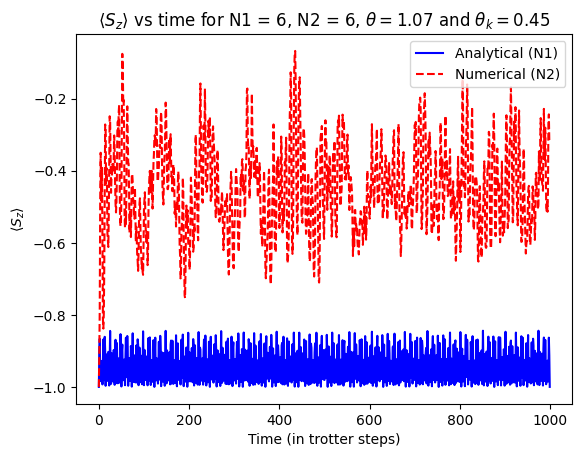

Time periods (numerical) for theta_k =  0.52  are  [166.66666667 111.11111111  76.92307692  66.66666667  58.82352941
  47.61904762  40.          11.49425287  11.11111111  10.52631579
   9.34579439   9.00900901   8.77192982   8.62068966   8.26446281
   5.61797753]
Time periods (analytical) for theta_k =  0.52  are  [10.75268817  3.90625     2.86532951]
Prominent Peak values (analytical) for theta =  1.07 theta_k =  0.52  are  [np.float64(10.668376009034544), np.float64(32.060226982304535), np.float64(12.982113783889254)]
Numerical asymptote is  -0.3968939322269988
Analytical asymptote is  -0.919889406064672


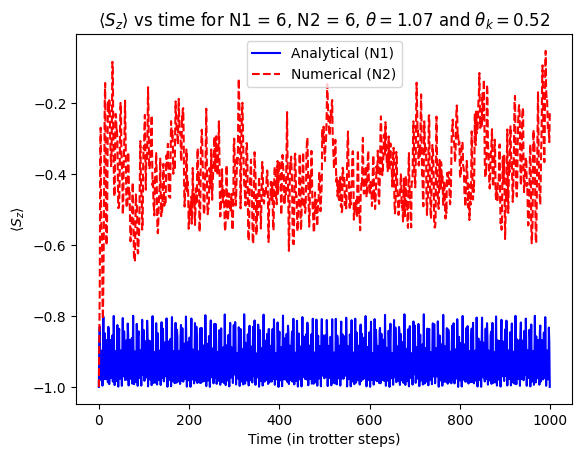

Time periods (numerical) for theta_k =  0.62  are  [125.          83.33333333  52.63157895  47.61904762  41.66666667
   7.75193798   7.63358779   7.51879699   6.02409639]
Time periods (analytical) for theta_k =  0.62  are  [9.09090909 3.98406375 2.7700831 ]
Prominent Peak values (analytical) for theta =  1.07 theta_k =  0.62  are  [np.float64(14.00207558900712), np.float64(43.74609881615911), np.float64(22.12972927232782)]
Numerical asymptote is  -0.3404451526345397
Analytical asymptote is  -0.8885969638625962


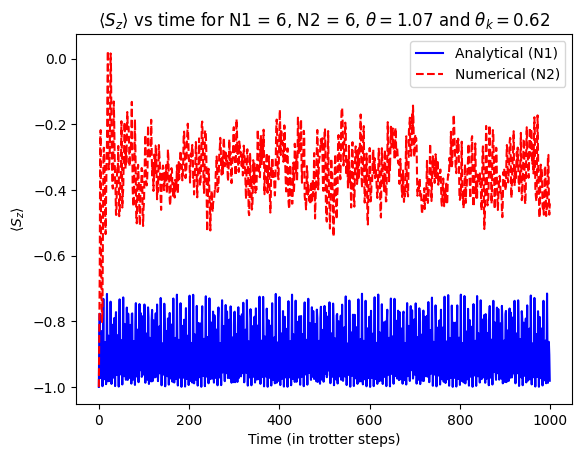

Time periods (numerical) for theta_k =  0.65  are  [200.         125.          83.33333333  45.45454545  40.
   7.51879699   7.40740741   6.57894737   5.98802395   3.30033003]
Time periods (analytical) for theta_k =  0.65  are  [8.69565217 4.         2.73972603]
Prominent Peak values (analytical) for theta =  1.07 theta_k =  0.65  are  [np.float64(13.81926035671782), np.float64(52.916812678707124), np.float64(18.50300901048762)]
Numerical asymptote is  -0.3258947512522477
Analytical asymptote is  -0.878389486278165


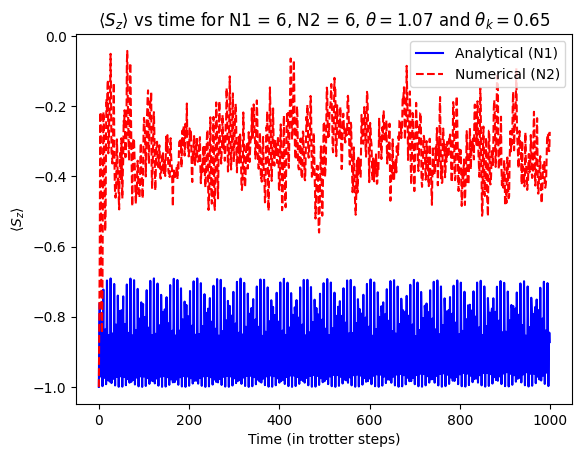

Time periods (numerical) for theta_k =  0.79  are  [111.11111111  90.90909091  52.63157895  34.48275862   6.84931507
   6.57894737   6.09756098   6.02409639   5.88235294]
Time periods (analytical) for theta_k =  0.79  are  [7.29927007 4.08163265 2.61780105]
Prominent Peak values (analytical) for theta =  1.07 theta_k =  0.79  are  [np.float64(20.005977999734924), np.float64(74.55841763744598), np.float64(26.083008165420296)]
Numerical asymptote is  -0.38766732198561044
Analytical asymptote is  -0.8269125611581469


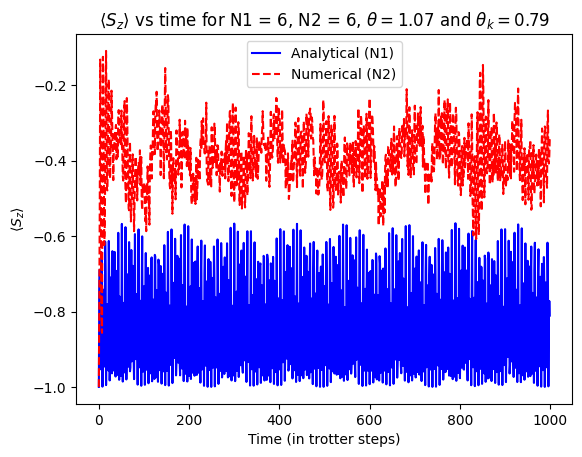

Time periods (numerical) for theta_k =  0.82  are  [100.          83.33333333  33.33333333   6.57894737   6.02409639
   5.91715976   5.81395349   5.68181818]
Time periods (analytical) for theta_k =  0.82  are  [7.09219858 4.09836066 2.5974026 ]
Prominent Peak values (analytical) for theta =  1.07 theta_k =  0.82  are  [np.float64(22.39802578972517), np.float64(79.18758040985799), np.float64(29.169593001681392)]
Numerical asymptote is  -0.3766113678767438
Analytical asymptote is  -0.8152654590702461


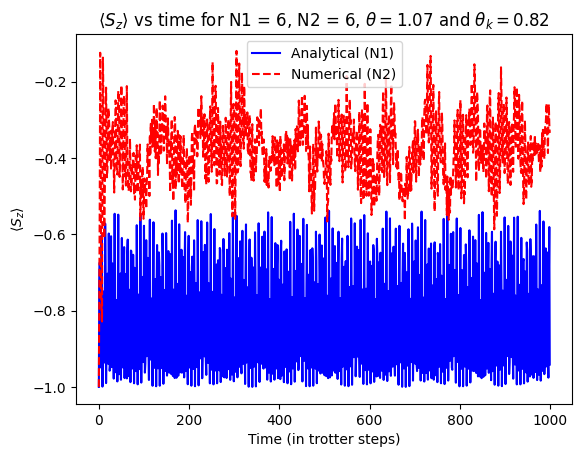

In [212]:
plot_Sz_comp(6,6,1.07,0.22,0.42)
plot_Sz_comp(6,6,1.07,0.22,0.45)
plot_Sz_comp(6,6,1.07,0.22,0.52)
plot_Sz_comp(6,6,1.07,0.22,0.62)
plot_Sz_comp(6,6,1.07,0.22,0.65)
plot_Sz_comp(6,6,1.07,0.22,0.79)
plot_Sz_comp(6,6,1.07,0.22,0.82)

Time periods (numerical) for theta_k =  0.52  are  [166.66666667 111.11111111  76.92307692  66.66666667  58.82352941
  47.61904762  40.          11.49425287  11.11111111  10.52631579
   9.34579439   9.00900901   8.77192982   8.62068966   8.26446281
   5.61797753]
Time periods (analytical) for theta_k =  0.52  are  [10.75268817  3.90625     2.86532951]
Prominent Peak values (analytical) for theta =  1.07 theta_k =  0.52  are  [np.float64(10.668376009034544), np.float64(32.060226982304535), np.float64(12.982113783889254)]
Numerical asymptote is  -0.3968939322269988
Analytical asymptote is  -0.919889406064672


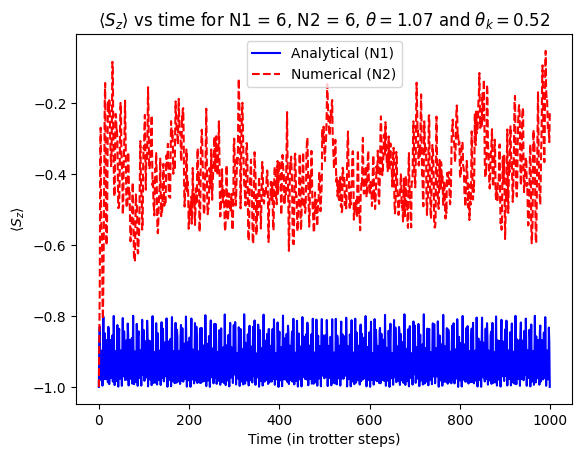

Time periods (numerical) for theta_k =  0.52  are  [100.          66.66666667  41.66666667  27.77777778  22.72727273
  11.23595506   8.84955752   3.52112676   3.4965035 ]
Time periods (analytical) for theta_k =  0.52  are  [10.75268817  4.34782609  3.10559006]
Prominent Peak values (analytical) for theta =  0.97 theta_k =  0.52  are  [np.float64(324.36666120386326), np.float64(16.5851493789332), np.float64(33.50040025942675)]
Numerical asymptote is  -0.46822899275762464
Analytical asymptote is  0.023900848012927668


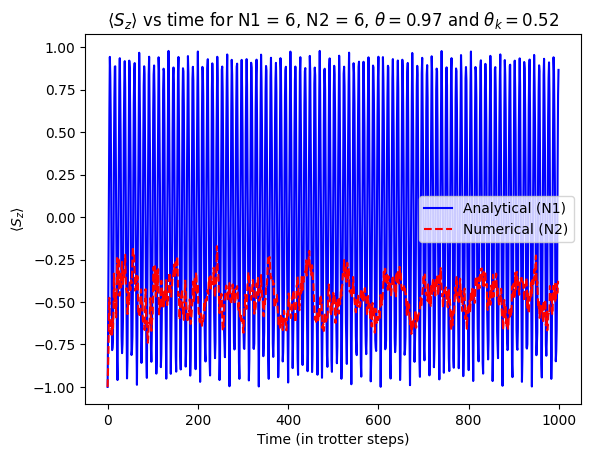

Time periods (numerical) for theta_k =  0.52  are  [500.         250.         142.85714286  71.42857143   7.1942446
   6.25      ]
Time periods (analytical) for theta_k =  0.52  are  [10.86956522  4.90196078  3.38983051]
Prominent Peak values (analytical) for theta =  0.87 theta_k =  0.52  are  [np.float64(424.70671297864214), np.float64(14.532954196987445), np.float64(35.55451077452979)]
Numerical asymptote is  -0.577514852851893
Analytical asymptote is  0.02867867326297418


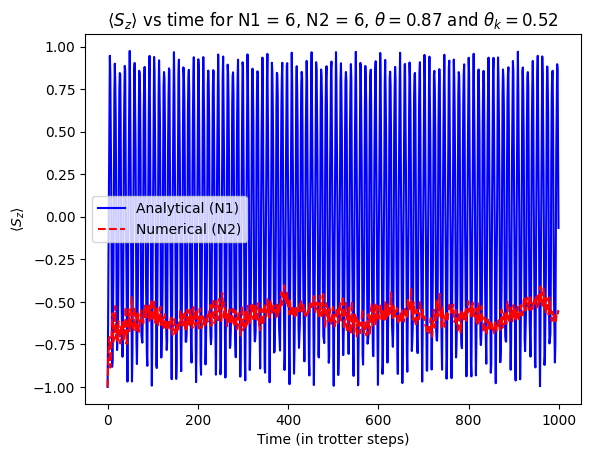

Time periods (numerical) for theta_k =  0.52  are  [7.46268657]
Time periods (analytical) for theta_k =  0.52  are  [10.98901099  5.61797753  3.71747212]
Prominent Peak values (analytical) for theta =  0.77 theta_k =  0.52  are  [np.float64(18.660682203652726), np.float64(64.08024105806386), np.float64(22.68236860552529)]
Numerical asymptote is  -0.8079997195398919
Analytical asymptote is  -0.849992379226833


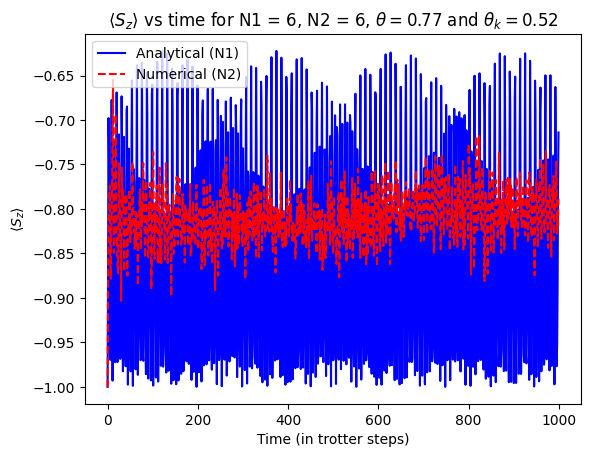

Time periods (numerical) for theta_k =  0.52  are  [90.90909091  8.1300813   3.62318841]
Time periods (analytical) for theta_k =  0.52  are  [11.23595506  6.53594771  4.1322314 ]
Prominent Peak values (analytical) for theta =  0.67 theta_k =  0.52  are  [np.float64(17.262682583921666), np.float64(73.72158439320191), np.float64(32.22156620336144)]
Numerical asymptote is  -0.7509421031160395
Analytical asymptote is  -0.8064964934332104


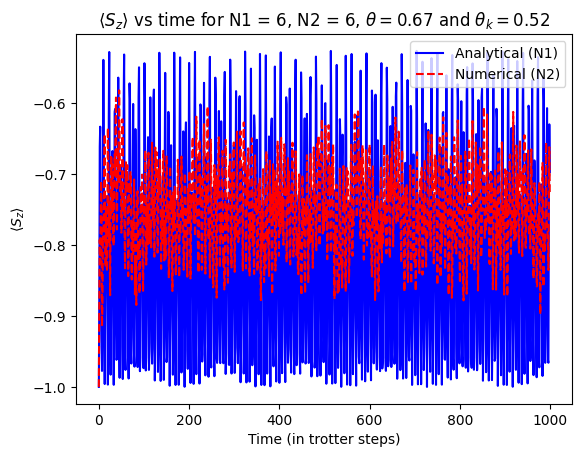

Time periods (numerical) for theta_k =  0.52  are  [125.           9.34579439   4.11522634]
Time periods (analytical) for theta_k =  0.52  are  [11.49425287  7.75193798  4.62962963]
Prominent Peak values (analytical) for theta =  0.57 theta_k =  0.52  are  [np.float64(26.791469210158045), np.float64(80.0661311694282), np.float64(36.53601185657147)]
Numerical asymptote is  -0.7303104778042391
Analytical asymptote is  -0.7461712251418996


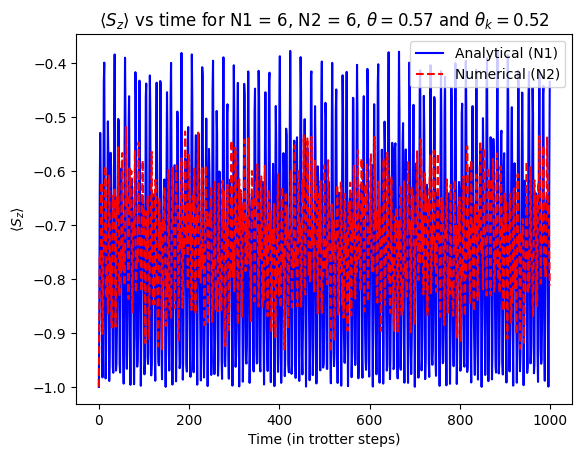

In [213]:
plot_Sz_comp(6,6,1.07,0.22,0.52)
plot_Sz_comp(6,6,0.97,0.22,0.52)
plot_Sz_comp(6,6,0.87,0.22,0.52)
plot_Sz_comp(6,6,0.77,0.22,0.52)
plot_Sz_comp(6,6,0.67,0.22,0.52)
plot_Sz_comp(6,6,0.57,0.22,0.52)